# ByT5 Model

In [1]:
# imports
from transformers import TrainingArguments, ByT5Tokenizer
from sklearn.metrics import roc_curve, auc
from utils import ByT5_model, ByT5_utils
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import os

In [2]:
load_dotenv()

# CONSTANTS
SAVE = True
VERSION = "v2"
RESULTS_PATH = os.getenv("RESULTS_PATH")
MODEL_PATH = os.getenv("MODEL_PATH")
MAX_LENGTH = 100

In [3]:
# load data
# need to put in our data here. the data format expects the following format:
# url, label
# url is the whole url
# label is 0 for non-phishing, and 1 for phishing

train_data = pd.read_csv("datasets/train.csv")
val_data = pd.read_csv("datasets/validation.csv")
bench_data = pd.read_csv("datasets/benchmark.csv")

print(f"{len(train_data)} training samples")
print(f"{len(val_data)} validation samples")
print(f"{len(bench_data)} benchmark samples")

15628 training samples
1953 validation samples
1955 benchmark samples


In [4]:
# training data
train_count = train_data["label"].value_counts()
val_count = val_data["label"].value_counts()
phish_count = train_count[1] + val_count[1]
benign_count = train_count[0] + val_count[0]
print(f"Training and validation data value count:\nphishing: {phish_count}\nbenign: {benign_count}")

# benchmark data
bench_count = bench_data["label"].value_counts()
phish_count = bench_count[1]
benign_count = bench_count[0]
print(f"Benchmark data value count:\nphishing: {phish_count}\nbenign: {benign_count}")

Training and validation data value count:
phishing: 6023
benign: 11558
Benchmark data value count:
phishing: 670
benign: 1285


In [5]:
# intialise model, tokenizer
model = ByT5_model.ByT5ForClassification(
    model_name='google/byt5-small',
    num_labels=2,
)
tokenizer = ByT5Tokenizer.from_pretrained('google/byt5-small')

In [6]:
# hyperparameters
BATCH_SIZE = 128
training_args = TrainingArguments(
    # saving results/checkpoints
    output_dir=RESULTS_PATH,
    save_safetensors=False,

    # evaluation
    eval_strategy="epoch",
    eval_steps=1,
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss',
    greater_is_better=False,
    
    # saving
    save_strategy="epoch",
    save_steps=1,
    save_total_limit=3,

    # hyperparameters
    learning_rate=0.005,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=100,
    weight_decay=0.01,
)

In [7]:
# training loop
trainer = ByT5_utils.train_ByT5(
    model=model,
    tokenizer=tokenizer,
    train_data=train_data,
    val_data=val_data,
    training_args=training_args,
    patience=5,
    max_length=MAX_LENGTH,
    )

Preparing data...


Map:   0%|          | 0/15628 [00:00<?, ? examples/s]

Map:   0%|          | 0/1953 [00:00<?, ? examples/s]

Data prepared.


  0%|          | 0/12300 [00:00<?, ?it/s]

Starting training


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.3516896963119507, 'eval_runtime': 7.4413, 'eval_samples_per_second': 262.453, 'eval_steps_per_second': 2.15, 'epoch': 1.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.31206080317497253, 'eval_runtime': 7.6528, 'eval_samples_per_second': 255.202, 'eval_steps_per_second': 2.091, 'epoch': 2.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.28353139758110046, 'eval_runtime': 7.7256, 'eval_samples_per_second': 252.794, 'eval_steps_per_second': 2.071, 'epoch': 3.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.3788693845272064, 'eval_runtime': 7.7397, 'eval_samples_per_second': 252.337, 'eval_steps_per_second': 2.067, 'epoch': 4.0}
{'loss': 0.3633, 'grad_norm': 0.39782026410102844, 'learning_rate': 0.004796747967479675, 'epoch': 4.07}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.2703072428703308, 'eval_runtime': 7.7162, 'eval_samples_per_second': 253.105, 'eval_steps_per_second': 2.074, 'epoch': 5.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.29246780276298523, 'eval_runtime': 7.755, 'eval_samples_per_second': 251.838, 'eval_steps_per_second': 2.063, 'epoch': 6.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.24783538281917572, 'eval_runtime': 8.2922, 'eval_samples_per_second': 235.523, 'eval_steps_per_second': 1.93, 'epoch': 7.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.22358950972557068, 'eval_runtime': 7.9299, 'eval_samples_per_second': 246.284, 'eval_steps_per_second': 2.018, 'epoch': 8.0}
{'loss': 0.2884, 'grad_norm': 0.20531931519508362, 'learning_rate': 0.00459349593495935, 'epoch': 8.13}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.24855226278305054, 'eval_runtime': 8.1268, 'eval_samples_per_second': 240.316, 'eval_steps_per_second': 1.969, 'epoch': 9.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.2537531852722168, 'eval_runtime': 8.0088, 'eval_samples_per_second': 243.857, 'eval_steps_per_second': 1.998, 'epoch': 10.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.2151191681623459, 'eval_runtime': 8.0749, 'eval_samples_per_second': 241.86, 'eval_steps_per_second': 1.981, 'epoch': 11.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.2487453818321228, 'eval_runtime': 8.077, 'eval_samples_per_second': 241.797, 'eval_steps_per_second': 1.981, 'epoch': 12.0}
{'loss': 0.2684, 'grad_norm': 0.2102232128381729, 'learning_rate': 0.004390243902439025, 'epoch': 12.2}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.23288947343826294, 'eval_runtime': 8.0439, 'eval_samples_per_second': 242.791, 'eval_steps_per_second': 1.989, 'epoch': 13.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.3562903106212616, 'eval_runtime': 8.2592, 'eval_samples_per_second': 236.463, 'eval_steps_per_second': 1.937, 'epoch': 14.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.23606239259243011, 'eval_runtime': 8.266, 'eval_samples_per_second': 236.268, 'eval_steps_per_second': 1.936, 'epoch': 15.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.21432669460773468, 'eval_runtime': 8.0788, 'eval_samples_per_second': 241.743, 'eval_steps_per_second': 1.98, 'epoch': 16.0}
{'loss': 0.2515, 'grad_norm': 0.3265453577041626, 'learning_rate': 0.0041869918699187, 'epoch': 16.26}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.22021956741809845, 'eval_runtime': 8.2378, 'eval_samples_per_second': 237.078, 'eval_steps_per_second': 1.942, 'epoch': 17.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.19696438312530518, 'eval_runtime': 8.2369, 'eval_samples_per_second': 237.104, 'eval_steps_per_second': 1.942, 'epoch': 18.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.2223578542470932, 'eval_runtime': 8.1621, 'eval_samples_per_second': 239.277, 'eval_steps_per_second': 1.96, 'epoch': 19.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.21194422245025635, 'eval_runtime': 8.2167, 'eval_samples_per_second': 237.688, 'eval_steps_per_second': 1.947, 'epoch': 20.0}
{'loss': 0.2411, 'grad_norm': 0.35793158411979675, 'learning_rate': 0.003983739837398374, 'epoch': 20.33}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.20773449540138245, 'eval_runtime': 8.0296, 'eval_samples_per_second': 243.224, 'eval_steps_per_second': 1.993, 'epoch': 21.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.2657430171966553, 'eval_runtime': 7.957, 'eval_samples_per_second': 245.445, 'eval_steps_per_second': 2.011, 'epoch': 22.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1959044635295868, 'eval_runtime': 8.137, 'eval_samples_per_second': 240.014, 'eval_steps_per_second': 1.966, 'epoch': 23.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.20867571234703064, 'eval_runtime': 8.1502, 'eval_samples_per_second': 239.627, 'eval_steps_per_second': 1.963, 'epoch': 24.0}
{'loss': 0.2309, 'grad_norm': 0.1348508894443512, 'learning_rate': 0.003780487804878049, 'epoch': 24.39}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.22594574093818665, 'eval_runtime': 8.2182, 'eval_samples_per_second': 237.643, 'eval_steps_per_second': 1.947, 'epoch': 25.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.21047204732894897, 'eval_runtime': 8.1749, 'eval_samples_per_second': 238.902, 'eval_steps_per_second': 1.957, 'epoch': 26.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17775104939937592, 'eval_runtime': 8.1149, 'eval_samples_per_second': 240.668, 'eval_steps_per_second': 1.972, 'epoch': 27.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.20891550183296204, 'eval_runtime': 7.7257, 'eval_samples_per_second': 252.793, 'eval_steps_per_second': 2.071, 'epoch': 28.0}
{'loss': 0.2212, 'grad_norm': 0.38980790972709656, 'learning_rate': 0.0035772357723577236, 'epoch': 28.46}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.21602649986743927, 'eval_runtime': 7.8353, 'eval_samples_per_second': 249.256, 'eval_steps_per_second': 2.042, 'epoch': 29.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1967821717262268, 'eval_runtime': 7.9321, 'eval_samples_per_second': 246.215, 'eval_steps_per_second': 2.017, 'epoch': 30.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.1946890503168106, 'eval_runtime': 8.101, 'eval_samples_per_second': 241.08, 'eval_steps_per_second': 1.975, 'epoch': 31.0}


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.18685580790042877, 'eval_runtime': 8.1197, 'eval_samples_per_second': 240.526, 'eval_steps_per_second': 1.971, 'epoch': 32.0}
{'train_runtime': 2435.8888, 'train_samples_per_second': 641.573, 'train_steps_per_second': 5.049, 'train_loss': 0.2611019223686156, 'epoch': 32.0}
Training ended


In [8]:
# saving model
if SAVE:
    torch.save(
        model.state_dict(),
        f"{MODEL_PATH}/byt5-model-{VERSION}.pth"
    )
    tokenizer.save_pretrained(f"{MODEL_PATH}/byt5-tokenizer-{VERSION}")

In [9]:
# load model
if SAVE:
    model = ByT5_model.ByT5ForClassification()
    model.load_state_dict(torch.load(f"{MODEL_PATH}/byt5-model-{VERSION}.pth", weights_only=True))
    tokenizer = ByT5Tokenizer.from_pretrained(f"{MODEL_PATH}/byt5-tokenizer-{VERSION}")

In [10]:
# evaluate trained model
ByT5_utils.evaluate_ByT5(trainer)

  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.17775104939937592,
 'eval_runtime': 8.148,
 'eval_samples_per_second': 239.691,
 'eval_steps_per_second': 1.964,
 'epoch': 32.0}

In [11]:
# predict single url
ByT5_utils.predict_single_url(
    bench_data["url"][0],
    model,
    tokenizer,
    max_length=MAX_LENGTH
)

(0, 0.12572263181209564)

In [12]:
# predict dataframe
y_true, predicted_classes, y_proba = ByT5_utils.predict_dataframe(
    bench_data,
    model,
    tokenizer,
)

Processing 1955 samples
Processed 1000 samples
Done, processed 1955 samples


In [13]:
accuracies = ByT5_utils.calculate_accuracy_at_thresholds(y_true, y_proba)
for threshold, accuracy in accuracies:
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}")

Threshold: 0.10, Accuracy: 0.81
Threshold: 0.20, Accuracy: 0.87
Threshold: 0.30, Accuracy: 0.89
Threshold: 0.40, Accuracy: 0.90
Threshold: 0.50, Accuracy: 0.91
Threshold: 0.60, Accuracy: 0.92
Threshold: 0.70, Accuracy: 0.92
Threshold: 0.80, Accuracy: 0.93
Threshold: 0.90, Accuracy: 0.93


In [14]:
# statistics
ByT5_utils.fpr_comparison(np.array(y_true), np.array(y_proba))

,0.010,0.009,0.008,0.007,0.006,0.005,0.004,0.003,0.002,0.001,0.000
precision,97.391304,97.544643,97.668998,98.258706,98.258706,98.637602,98.637602,99.099099,99.344262,99.667774,100.000000
fpr,0.009339,0.008560,0.007782,0.005447,0.005447,0.003891,0.003891,0.002335,0.001556,0.000778,0.000000
specificity,99.066148,99.143969,99.221790,99.455253,99.455253,99.610895,99.610895,99.766537,99.844358,99.922179,100.000000
accuracy,88.030691,87.519182,86.649616,85.575448,85.575448,83.989770,83.989770,82.455243,81.125320,81.023018,71.253197
recall,66.865672,65.223881,62.537313,58.955224,58.955224,54.029851,54.029851,49.253731,45.223881,44.776119,16.119403
f1_score,79.292035,78.175313,76.251137,73.694030,73.694030,69.816779,69.816779,65.802592,62.153846,61.791967,27.763496
threshold,0.992315,0.993869,0.994970,0.997104,0.997104,0.998566,0.998566,0.999326,0.999615,0.999664,0.999997


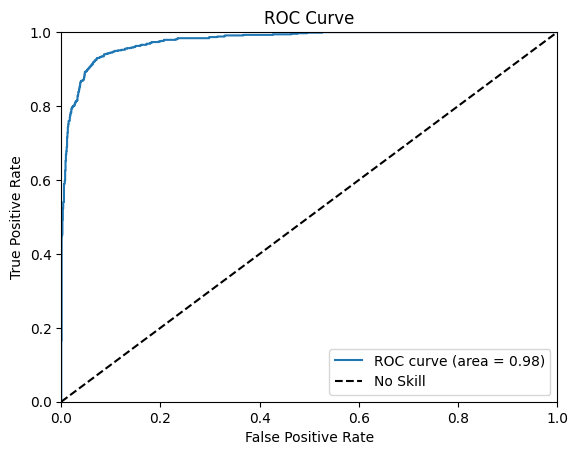

In [15]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_proba)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()